In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import root
import h5py
import os
import analysis

## Run code on qlua output

In [4]:
cfgbase = 'cl3_16_48_b6p1_m0p2450'

# some nice looking momentum inversion data.
# job_num = 16142
# mom_list = []
# for i in range(1, 8 + 1):
#     for j in range(2, 10 + 1, 2):
#         if j + 1 >= i and not (i == 8 and j == 10):
#             mom_list.append([i, i, i, j])

# job_num = 16165
# mom_list = []
# for i in range(1, 16 + 1):
#     for j in range(i, 16 + 1):
#         if j % 2 == 0:
#             mom_list.append([i, i, i, j])

# job_num = 17680
# job_num = 17809
job_num = 19214
# When we do the momentum inversion, Z(p) is purely real (although large). We also 
mom_list = [[1, 1, 1, 1], [2, 2, 2, 2], [3, 3, 3, 3], [4, 4, 4, 4], [5, 5, 5, 5]]

analysis.mom_list = mom_list
analysis.mom_str_list = [analysis.plist_to_string(p) for p in mom_list]

base = './output/' + cfgbase + '_' + str(job_num)
props = analysis.readfile(base, mu = -1)
# props, threepts = analysis.readfile(base)
# props, threepts = analysis.readfile(base, dpath = 'prop1/')

V = analysis.hypervolume

In [5]:
mom_list = analysis.mom_list
s = 0    # TODO seed this with something random
props_boot = analysis.bootstrap(props, seed = s)
props_inv = analysis.invert_prop(props_boot)
Zq = analysis.quark_renorm(props_inv)

In [ ]:
threept_boot = analysis.bootstrap(threepts, seed = s)
Γ = analysis.amputate(props_inv, threept_boot)
Γ_B, Γ_B_inv = analysis.born_term()

In [ ]:
Z = analysis.get_Z(Zq, Γ, Γ_B_inv)
# Z = analysis.get_Z(Zq, Γ, Γ_B)

In [ ]:
#compare with analysis_EXAMPLE.py for p2222 and cfg 200
print('Two point')
print(props_boot['p2222'][0, 0])
print('Two point inverse')
print(props_inv['p2222'][0, 0])
print('Quark renormalization')
print(Zq['p2222'])

In [ ]:
μ, σ = analysis.get_statistics_Z(Z)
print(μ)
print(σ)

In [12]:
Zq_list = np.array([np.mean(np.mean(Zq[analysis.plist_to_string(p)], axis = 1)) for p in mom_list])
σq = np.array([np.std(np.mean(Zq[analysis.plist_to_string(p)], axis = 1)) for p in mom_list])

In [17]:
print(Zq_list)
print(p_squared)

[0.7134656 +0.j 0.7620714 +0.j 0.8054104 +0.j 0.8390945 +0.j
 0.86208266+0.j]
[ 0.47977244  1.91908974  4.31795193  7.67635898 11.9943109 ]


<IPython.core.display.Javascript object>


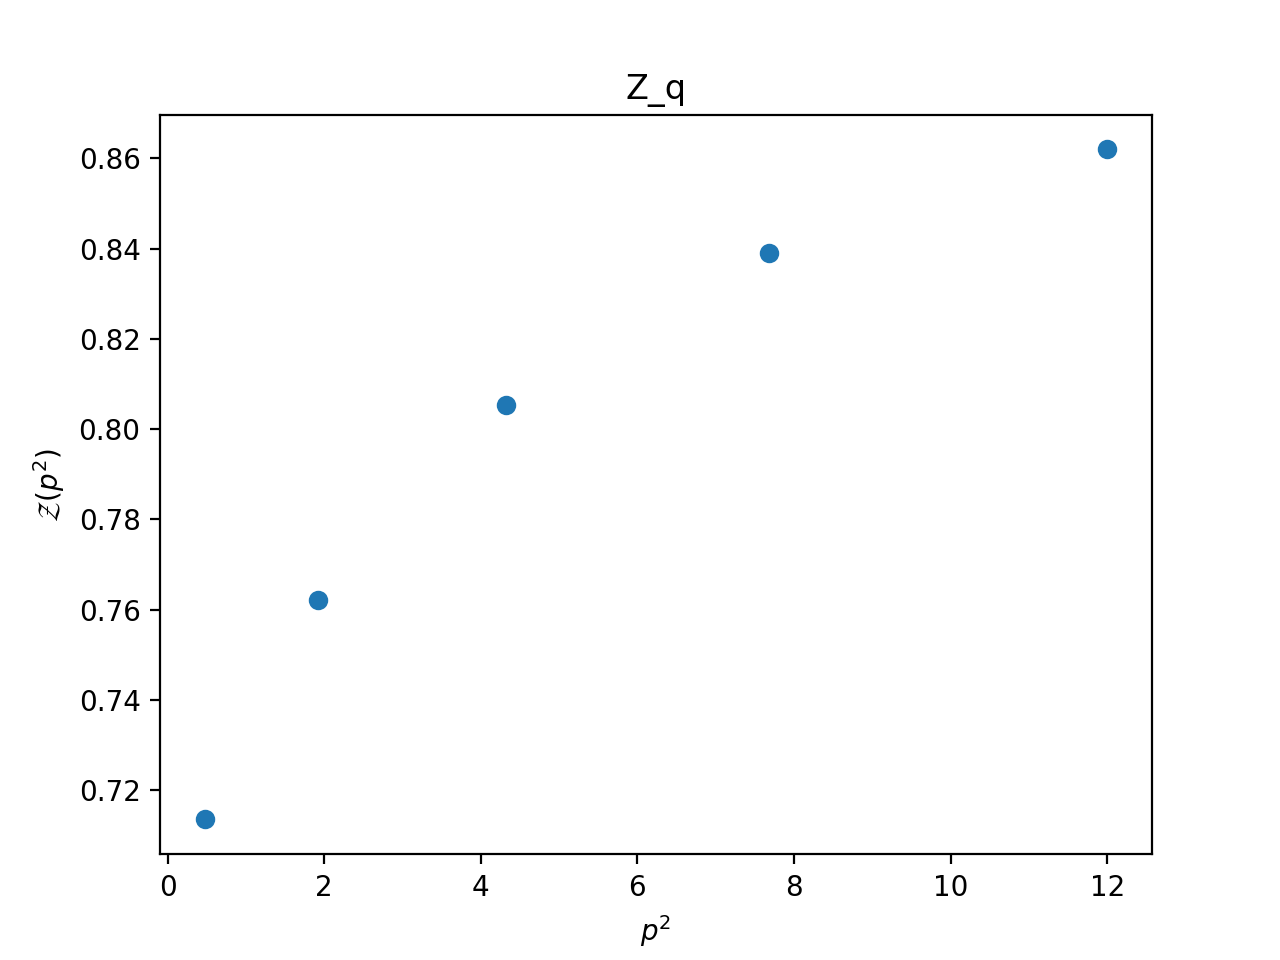

In [13]:
L, T = 16, 48
momenta = np.array([[k[0] / L, k[1] / L, k[2] / L, k[3] / T] for k in mom_list]) * 2*np.pi
p_squared = np.array([np.abs(analysis.square(p)) for p in momenta])
# μ_list = np.array([μ[analysis.plist_to_string(p)] for p in mom_list])
# σ_list = np.array([σ[analysis.plist_to_string(p)] for p in mom_list])
plt.figure()
plt.errorbar(p_squared, np.real(Zq_list), yerr = np.abs(σq), fmt = 'o')
# for i in range(len(p_squared)):
#     plt.text(p_squared[i], np.abs(μ_list[i]), analysis.mom_list[i])
plt.ylabel('$\mathcal{Z}(p^2)$')
plt.xlabel('$p^2$')
plt.title('Z_q')
plt.show()

In [ ]:
for p, psquared in zip(mom_list, p_squared):
    print(p, psquared)

In [ ]:
# plt.savefig('/Users/theoares/lqcd/npr_momfrac/output/cl3_16_48_b6p1_m0p2450_16142/renorm_constant_zoomed_error.pdf')

In [ ]:
# cfg_list, err, means = analysis.error_analysis(Z, 4, 4)

In [ ]:
# plt.figure()
# plt.scatter(cfg_list, err)
# plt.title('Error scaling at p = [2, 2, 2, 2]')
# plt.xlabel('Number configurations')
# plt.ylabel('Error')
# plt.ylim((.0004, .002))
# plt.show()